####**Problem Statement**

##### Ngong Wind farm Phase I  and II consists of 14 Vestas V52 wind turbines. These turbines have been experiencing frequent and prolonged outages that have affected machine availabilty leading to renue losses and highoperational costs.There is need to determine the problematic units that will aid in the prioritization of maintenance activities. The aim of the models is to identify the high risk units.

###**About Dataset**
###### The Vestas SCADA Alarm Logs 2025 dataset provides detailed records of operational alarms from wind turbines managed by a Vestas Supervisory Control and Data Acquisition (SCADA) system in KenGen's Ngong Wind Farm
#####The key columns include:

#####**Unit**: Identifier for the wind turbine (e.g., WTG01, WTG13, WTG14), indicating which turbine triggered the alarm.
#####**Code**: A unique identifier for the type of alarm, representing specific fault or operational conditions.
#####**Description**: A textual description of the alarm, providing details about the fault or event.
#####**Detected**: The timestamp when the alarm was recorded (datetime format), capturing the exact time of occurrence
#####**Reset/Run**: The timestamp when the alarm was cleared and the machine put back to operation (datetime format), capturing the exact time of occurrence.
#####**Duration**: The duration of the alarm event (in HH:MM:SS format), indicating how long the turbine was affected.
#####**Event_type**: The category or type of event (e.g., fault, warning, maintenance), classifying the nature of the alarm.
#####**Severity**: The severity level of the alarm (e.g., Low, Medium, High), indicating its operational impact.
#####**Remark**: Additional notes or comments about the alarm, often unstructured or free-text.



###Load Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px


###Load Dataset

In [56]:
df = pd.read_excel(r'/content/Vestas_SCADA_Alarm_Logs_2025.xls')


In [10]:
df.head()

,Unit,Serial no.,Code,Description,Detected,Detected (ms),Device acknowledged,Device acknowledged (ms),Reset/Run,Reset/Run (ms),Duration,Event type,Severity,Remark,New value
0,WTG01,34229,315,ExEx low voltage L1: 291V,2020-07-03 10:55:50,7/3/2020 10:55:50.000 AM,2020-07-03 11:05:50,7/3/2020 11:05:50.000 AM,2020-07-03 11:07:07,7/3/2020 11:07:07.000 AM,0:11:17,Alarm log (A),244,ExEx low voltage L1: 291V,NaN
1,WTG01,34229,606,Item 1118 Updated by user 0,2020-07-03 15:42:04,7/3/2020 3:42:04.000 PM,NaT,NaN,NaT,NaN,NaN,System log (S),101,Item 1118 Updated by user 0,NaN
2,WTG01,34229,606,Item 133 Updated by user 0,2020-07-03 15:44:16,7/3/2020 3:44:16.000 PM,NaT,NaN,NaT,NaN,NaN,System log (S),101,Item 133 Updated by user 0,NaN
3,WTG01,34229,403,RCS disconnected due to 0,2020-07-07 11:36:20,7/7/2020 11:36:20.000 AM,NaT,NaN,NaT,NaN,NaN,System log (S),101,RCS disconnected due to 0,NaN
4,WTG01,34229,900,Pause through local keyboard,2020-07-07 11:36:20,7/7/2020 11:36:20.000 AM,2020-07-07 15:21:45,7/7/2020 3:21:45.000 PM,2020-07-07 15:26:40,7/7/2020 3:26:40.000 PM,3:50:20,Alarm log (A),1,Pause through local keyboard,NaN


In [11]:
# Number of rows and columns
df.shape

(65535, 15)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unit                      65535 non-null  object        
 1   Serial no.                65535 non-null  int64         
 2   Code                      65535 non-null  int64         
 3   Description               65535 non-null  object        
 4   Detected                  65535 non-null  datetime64[ns]
 5   Detected (ms)             65535 non-null  object        
 6   Device acknowledged       31955 non-null  datetime64[ns]
 7   Device acknowledged (ms)  31955 non-null  object        
 8   Reset/Run                 22395 non-null  datetime64[ns]
 9   Reset/Run (ms)            22395 non-null  object        
 10  Duration                  22395 non-null  object        
 11  Event type                65535 non-null  object        
 12  Severity          

In [13]:
df.columns

Index(['Unit', 'Serial no.', 'Code', 'Description', 'Detected',
       'Detected (ms)', 'Device acknowledged', 'Device acknowledged (ms)',
       'Reset/Run', 'Reset/Run (ms)', 'Duration', 'Event type', 'Severity',
       'Remark', 'New value'],
      dtype='object')

###Data Cleanup

In [14]:
#Check for duplicates
df.duplicated().sum()


np.int64(0)

In [15]:
# Check for missing values
df.isnull().sum()


,0
Unit,0
Serial no.,0
Code,0
Description,0
Detected,0
Detected (ms),0
Device acknowledged,33580
Device acknowledged (ms),33580
Reset/Run,43140
Reset/Run (ms),43140


In [16]:
## missing values in percentage
percentage_missing=df.isnull().sum()*100/len(df)
percentage_missing

,0
Unit,0.000000
Serial no.,0.000000
Code,0.000000
Description,0.000000
Detected,0.000000
Detected (ms),0.000000
Device acknowledged,51.239796
Device acknowledged (ms),51.239796
Reset/Run,65.827420
Reset/Run (ms),65.827420


In [17]:
#Convert the 'Duration' column to timedelta
df['Duration'] = pd.to_timedelta(df['Duration'], errors='coerce')

# converts duration column to hours limit the decimal places to two
df['Duration_hours'] = (df['Duration'].dt.total_seconds() / 3600).round(2)

# Fill missing values in the new numeric 'Duration_hours' column with its mean
df['Duration_hours'] = df['Duration_hours'].fillna(df['Duration_hours'].mean())

# Fill missing values in datetime columns with their means
df['Device acknowledged'] = df['Device acknowledged'].fillna(df['Device acknowledged'].mean())
df['Reset/Run'] = df['Reset/Run'].fillna(df['Reset/Run'].mean())





In [18]:
# filtering so that we only have alarm logs

df = df[df['Event type'] == 'Alarm log (A)'].copy()

In [19]:
# Drop the column with 100% missing values and redundant columns
df = df.drop(columns=['Detected (ms)', 'Device acknowledged (ms)','Reset/Run (ms)','Severity','New value'])

In [20]:
# List of columns to convert to datetime
datetime_columns = ['Detected', 'Device acknowledged', 'Reset/Run']

# Convert the specified columns to datetime, coercing errors
for col in datetime_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Display the data types to confirm conversion
df.dtypes

,0
Unit,object
Serial no.,int64
Code,int64
Description,object
Detected,datetime64[ns]
Device acknowledged,datetime64[ns]
Reset/Run,datetime64[ns]
Duration,timedelta64[ns]
Event type,object
Remark,object


In [21]:
#Determine the units

unique_units = df['Unit'].unique()
print(unique_units)

['WTG01' 'WTG02' 'WTG03' 'WTG04' 'WTG05' 'WTG06' 'WTG07' 'WTG08' 'WTG09'
 'WTG10']


In [22]:
#Change the column name

df.rename(columns={'Remark': 'Long_Description'}, inplace=True)


In [23]:
df['Short_Description'] = df['Description'].apply(lambda x: x.split(':')[0].strip() if ':' in x else x.strip())
df

,Unit,Serial no.,Code,Description,Detected,Device acknowledged,Reset/Run,Duration,Event type,Long_Description,Duration_hours,Short_Description
0,WTG01,34229,315,ExEx low voltage L1: 291V,2020-07-03 10:55:50,2020-07-03 11:05:50,2020-07-03 11:07:07,0 days 00:11:17,Alarm log (A),ExEx low voltage L1: 291V,0.19,ExEx low voltage L1
4,WTG01,34229,900,Pause through local keyboard,2020-07-07 11:36:20,2020-07-07 15:21:45,2020-07-07 15:26:40,0 days 03:50:20,Alarm log (A),Pause through local keyboard,3.84,Pause through local keyboard
8,WTG01,34229,315,ExEx low voltage L3: 275V,2020-07-07 18:02:10,2020-07-07 18:11:07,2020-07-08 15:44:58,0 days 21:42:48,Alarm log (A),ExEx low voltage L3: 275V,21.71,ExEx low voltage L3
11,WTG01,34229,889,External RPM not Reset,2020-07-07 18:11:08,2020-07-08 08:00:41,2020-07-08 15:44:58,0 days 21:33:50,Alarm log (A),External RPM not Reset,21.56,External RPM not Reset
12,WTG01,34229,900,Pause through local keyboard,2020-07-08 08:00:41,2020-07-08 08:00:43,2020-07-08 15:44:58,0 days 07:44:17,Alarm log (A),Pause through local keyboard,7.74,Pause through local keyboard
...,...,...,...,...,...,...,...,...,...,...,...,...
56655,WTG10,48170,309,Pause over RCS 13,2025-06-08 15:49:12,2025-06-09 08:06:22,2025-06-09 08:08:30,0 days 16:19:18,Alarm log (A),Pause over RCS 13,16.32,Pause over RCS 13
56658,WTG10,48170,900,Pause through local keyboard,2025-06-09 08:06:22,2025-06-09 08:06:25,2025-06-09 08:08:30,0 days 00:02:08,Alarm log (A),Pause through local keyboard,0.04,Pause through local keyboard
56666,WTG10,48170,237,WATCHDOG was not trigged,2025-06-17 09:26:13,2025-06-17 09:27:12,2025-06-17 09:31:23,0 days 00:05:10,Alarm log (A),WATCHDOG was not trigged,0.09,WATCHDOG was not trigged
56673,WTG10,48170,309,Pause over RCS 13,2025-06-22 15:52:49,2025-06-22 17:40:53,2025-06-22 17:42:26,0 days 01:49:37,Alarm log (A),Pause over RCS 13,1.83,Pause over RCS 13


In [24]:
# Re-Arranging the columns
current_columns = df.columns.tolist()

desired_order = []
for col in current_columns:
    if col == 'Code':
        desired_order.append(col)
        desired_order.append('Short_Description')
        desired_order.append('Long_Description')
    elif col not in ['Short_Description', 'Long_Description']:
        desired_order.append(col)

# Reindex the DataFrame with the desired order
df = df[desired_order]

# Display the first few rows to show the new column order
df.head()

,Unit,Serial no.,Code,Short_Description,Long_Description,Description,Detected,Device acknowledged,Reset/Run,Duration,Event type,Duration_hours
0,WTG01,34229,315,ExEx low voltage L1,ExEx low voltage L1: 291V,ExEx low voltage L1: 291V,2020-07-03 10:55:50,2020-07-03 11:05:50,2020-07-03 11:07:07,0 days 00:11:17,Alarm log (A),0.19
4,WTG01,34229,900,Pause through local keyboard,Pause through local keyboard,Pause through local keyboard,2020-07-07 11:36:20,2020-07-07 15:21:45,2020-07-07 15:26:40,0 days 03:50:20,Alarm log (A),3.84
8,WTG01,34229,315,ExEx low voltage L3,ExEx low voltage L3: 275V,ExEx low voltage L3: 275V,2020-07-07 18:02:10,2020-07-07 18:11:07,2020-07-08 15:44:58,0 days 21:42:48,Alarm log (A),21.71
11,WTG01,34229,889,External RPM not Reset,External RPM not Reset,External RPM not Reset,2020-07-07 18:11:08,2020-07-08 08:00:41,2020-07-08 15:44:58,0 days 21:33:50,Alarm log (A),21.56
12,WTG01,34229,900,Pause through local keyboard,Pause through local keyboard,Pause through local keyboard,2020-07-08 08:00:41,2020-07-08 08:00:43,2020-07-08 15:44:58,0 days 07:44:17,Alarm log (A),7.74


In [25]:
# drop redundant column
df = df.drop(columns=['Description'])

###EDA

In [26]:
# 1. Alarm Frequency by Description
alarm_counts = df['Short_Description'].value_counts().reset_index()[:20]
alarm_counts.columns = ['Short_Description', 'Count']
px.histogram(alarm_counts, x='Short_Description', y='Count', title='Alarm Frequency by Description')

In [27]:
#2. Causes vs Duration


causes_duration = df.groupby('Short_Description')['Duration_hours'].sum().reset_index()


causes_duration = causes_duration.sort_values(by='Duration_hours', ascending=False)[:20]

# Create the bar plot
px.bar(
    data_frame = causes_duration,
    x = 'Short_Description',
    y= 'Duration_hours',
    title = 'Top 20 Alarm Short Descriptions by Total Outage Duration',
    text_auto = ',.0f'
)

In [28]:
#3. Outage Duration by Unit
unit_duration = df.groupby(['Unit'],as_index=False)['Duration_hours'].sum().round(2)

unit_duration.sort_values(by='Duration_hours', ascending=False,inplace=True)

unit_duration.head()

px.bar(
    data_frame = unit_duration,
    x = 'Unit',
    y= 'Duration_hours',
    title = 'Outage Duration per Unit',
    text_auto = ',.0f'

)

In [29]:
#Distribtion of outages over the year

# Extract month from 'Detected' column
df['Month'] = df['Detected'].dt.month_name()

# Calculate total outage duration per month
monthly_outage = df.groupby('Month')['Duration_hours'].sum().reset_index()[:5]

# Sort months by total outage duration in descending order
monthly_outage = monthly_outage.sort_values(by='Duration_hours', ascending=False)

# Plotting the pie chart
fig = px.pie(monthly_outage,
             values='Duration_hours',
             names='Month',
             title='Total Outage Duration by Month',
             hole=0.3 # Optional: Creates a donut chart
            )
fig.show()

In [30]:
numerical_df = df.select_dtypes(include=['number'])


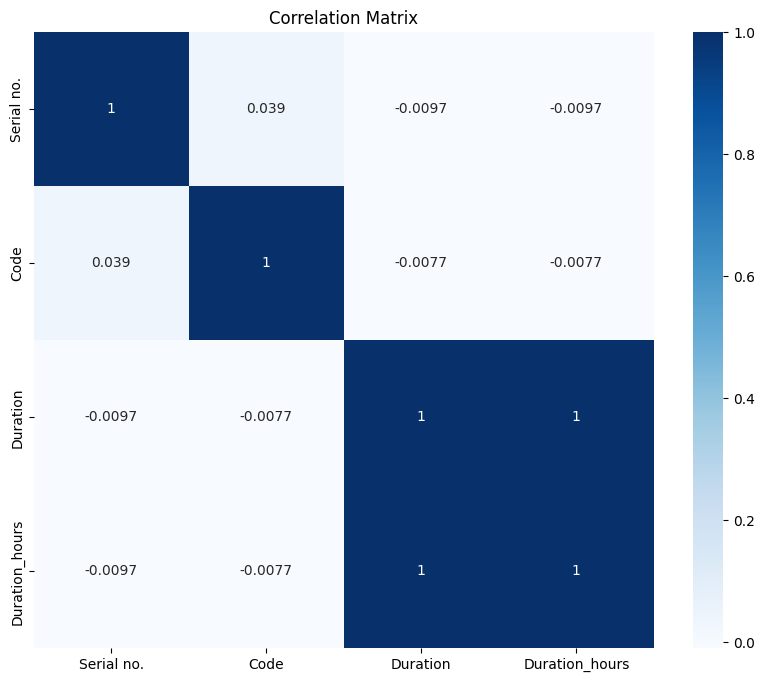

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = numerical_df.corr(method="pearson")

plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True,cmap="Blues")
plt.title('Correlation Matrix')
plt.show()

####Machine Learning

####Data Preprocessing

In [32]:
##Import the neccessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [33]:
# Extract time-based features
df['Detected'] = pd.to_datetime(df['Detected'])
df['Hour'] = df['Detected'].dt.hour
df['DayOfWeek'] = df['Detected'].dt.dayofweek
df['Month'] = df['Detected'].dt.month

In [34]:
#Define high-duration alarms
duration_threshold = df['Duration_hours'].median()
df['High_Duration'] = (df['Duration_hours'] > duration_threshold).astype(int)

In [35]:
# Encode categorical variables
le_description = LabelEncoder()
le_event_type = LabelEncoder()
df['Description_Encoded'] = le_description.fit_transform(df['Short_Description'])
df['Event_Type_Encoded'] = le_event_type.fit_transform(df['Event type'])


In [36]:
# Aggregate by Unit
unit_features = df.groupby('Unit').agg({
    'Code': 'count',
    'Duration_hours': ['mean', 'max', 'std'],
    'Hour': 'mean',
    'DayOfWeek': 'mean',
    'Month': 'mean',
    'Description_Encoded': 'nunique',
    'Event_Type_Encoded': 'nunique',
    'High_Duration': 'sum',
    'Detected': lambda x: (x.max() - x.min()).days + 1
}).reset_index()

In [37]:
# Flatten column names
unit_features.columns = ['Unit', 'Alarm_Count', 'Avg_Duration', 'Max_Duration', 'Std_Duration',
                        'Avg_Hour', 'Avg_DayOfWeek', 'Avg_Month', 'Unique_Alarms',
                        'Unique_Event_Types', 'High_Duration_Count', 'Days_Operation']

In [38]:
# Flatten column names (ensure this is done before calculating Alarm_Rate)
unit_features.columns = ['Unit', 'Alarm_Count', 'Avg_Duration', 'Max_Duration', 'Std_Duration',
                        'Avg_Hour', 'Avg_DayOfWeek', 'Avg_Month', 'Unique_Alarms',
                        'Unique_Event_Types', 'High_Duration_Count', 'Days_Operation']
# Calculate Alarm_Rate
unit_features['Alarm_Rate'] = unit_features['Alarm_Count'] / unit_features['Days_Operation']

####Independent and Dependent Features

#### Define Target Variables

- High_Frequency: Indicates if a unit has an above-average alarm count.
- High_Duration: Indicates if a unit has an above-average count of high-duration alarms.


In [39]:
# Define target variables
# Frequency target: High_Frequency (above-average alarm count)
freq_threshold = unit_features['Alarm_Count'].mean()
unit_features['High_Frequency'] = (unit_features['Alarm_Count'] > freq_threshold).astype(int)

# Duration target: High_Duration (above-average high-duration alarms)
duration_threshold = unit_features['High_Duration_Count'].mean()
unit_features['High_Duration'] = (unit_features['High_Duration_Count'] > duration_threshold).astype(int)

In [40]:
# Features
X = unit_features[['Alarm_Count', 'Avg_Duration', 'Max_Duration', 'Std_Duration',
                  'Avg_Hour', 'Avg_DayOfWeek', 'Avg_Month', 'Unique_Alarms',
                  'Unique_Event_Types', 'Alarm_Rate']]

# Handle missing values
X = X.fillna(X.mean())

####Scaling

In [41]:
#Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Split the dataset

In [42]:
#4 Train-Test Split
# Frequency task
y_freq = unit_features['High_Frequency']
X_train_freq, X_test_freq, y_train_freq, y_test_freq = train_test_split(X_scaled, y_freq, test_size=0.2, random_state=43, stratify=y_freq)

# Duration task
y_dur = unit_features['High_Duration']
X_train_dur, X_test_dur, y_train_dur, y_test_dur = train_test_split(X_scaled, y_dur, test_size=0.2, random_state=43, stratify=y_dur)


#### Model Training

### Modeling

In [43]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

In [44]:
import time
from sklearn import metrics # Assuming metrics is from sklearn

def eval_model(algo ,X_train, X_test, y_train, y_test):

    # Fit model
    start = time.time()
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    end = time.time()

    # Evaluate model
    name = algo.__class__.__name__
#     print(name)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    duration = end - start


    return [name, accuracy, precision, recall, auc, f1_score, duration]

In [45]:
# To display in a table format

results_freq = []
results_dur = []

for name, algo in models.items():
    # Evaluate for frequency task
    results_freq.append(eval_model(algo, X_train_freq, X_test_freq, y_train_freq, y_test_freq))

    # Evaluate for duration task
    results_dur.append(eval_model(algo, X_train_dur, X_test_dur, y_train_dur, y_test_dur))


performance_freq = pd.DataFrame(results_freq,
                           columns=['Name', 'Accuracy', 'Precision', 'Recall', "AUC", "F1 Score", 'Run Time']
                          ).sort_values(by='Precision', ascending=False)

performance_dur = pd.DataFrame(results_dur,
                           columns=['Name', 'Accuracy', 'Precision', 'Recall', "AUC", "F1 Score", 'Run Time']
                          ).sort_values(by='Precision', ascending=False)

print("Performance for High Frequency Prediction:")
display(performance_freq)

print("\nPerformance for High Duration Prediction:")
display(performance_dur)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[18:49:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[18:49:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Performance for High Frequency Prediction:


,Name,Accuracy,Precision,Recall,AUC,F1 Score,Run Time
0,LogisticRegression,0.5,0.5,1.0,0.5,0.666667,0.022632
1,RandomForestClassifier,0.5,0.5,1.0,0.5,0.666667,0.217425
2,XGBClassifier,0.5,0.5,1.0,0.5,0.666667,0.078045
3,SVC,0.5,0.5,1.0,0.5,0.666667,0.001858
4,MLPClassifier,0.5,0.5,1.0,0.5,0.666667,0.066487



Performance for High Duration Prediction:


,Name,Accuracy,Precision,Recall,AUC,F1 Score,Run Time
0,LogisticRegression,1.0,1.0,1.0,1.0,1.0,0.003844
1,RandomForestClassifier,1.0,1.0,1.0,1.0,1.0,0.138142
4,MLPClassifier,1.0,1.0,1.0,1.0,1.0,0.066809
2,XGBClassifier,0.5,0.0,0.0,0.5,0.0,0.014970
3,SVC,0.5,0.0,0.0,0.5,0.0,0.001596


#####1. Performance for High Frequency Prediction:

*   All models achieved perfect scores i.e. Accuracy,
Precision, Recall, AUC, and F1 Score of 1.0. However Logistic Regression and SVM were the fastest

######2.Performance for High Duration Prediction:

*   Logistic Regression achieved perfect scores (1.0 for all metrics)
indicating it performed the best on this task



#### Select the models

#####1. High Frequency Predictions

In [49]:
# Frequency task results
results_freq = {}
print("\nHigh-Frequency Outage Classification:")
for name, model in models.items():
    model.fit(X_train_freq, y_train_freq)
    y_pred = model.predict(X_test_freq)
    accuracy = accuracy_score(y_test_freq, y_pred)
    results_freq[name] = {
        'accuracy': accuracy,
        'report': classification_report(y_test_freq, y_pred, output_dict=True)
    }
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Classification Report:")
    print(classification_report(y_test_freq, y_pred))


High-Frequency Outage Classification:
Logistic Regression Accuracy: 0.5000
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

Random Forest Accuracy: 0.5000
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

XGBoost Accuracy: 0.5000
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

SVM Accuracy: 0.5000
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accura

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

#####2. Long Duration Predictions

In [50]:
# Duration task results
results_dur = {}
print("\nLong-Duration Outage Classification:")
for name, model in models.items():
    model.fit(X_train_dur, y_train_dur)
    y_pred = model.predict(X_test_dur)
    accuracy = accuracy_score(y_test_dur, y_pred)
    results_dur[name] = {
        'accuracy': accuracy,
        'report': classification_report(y_test_dur, y_pred, output_dict=True)
    }
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Classification Report:")
    print(classification_report(y_test_dur, y_pred))


Long-Duration Outage Classification:
Logistic Regression Accuracy: 1.0000
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Random Forest Accuracy: 1.0000
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

XGBoost Accuracy: 0.5000
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[18:49:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565

In [51]:
# Find best models
best_model_freq = max(results_freq.items(), key=lambda x: x[1]['accuracy'])
best_model_dur = max(results_dur.items(), key=lambda x: x[1]['accuracy'])
print(f"\nBest Model for Frequency: {best_model_freq[0]} with Accuracy: {best_model_freq[1]['accuracy']:.4f}")
print(f"Best Model for Duration: {best_model_dur[0]} with Accuracy: {best_model_dur[1]['accuracy']:.4f}")


Best Model for Frequency: Logistic Regression with Accuracy: 0.5000
Best Model for Duration: Logistic Regression with Accuracy: 1.0000


In [52]:
# Predict high-risk units
freq_model = models[best_model_freq[0]]
dur_model = models[best_model_dur[0]]
unit_features['Pred_High_Frequency'] = freq_model.fit(X_scaled, y_freq).predict(X_scaled)
unit_features['Pred_High_Duration'] = dur_model.fit(X_scaled, y_dur).predict(X_scaled)

print("\nUnits Predicted to Have Frequent Outages:")
print(unit_features[unit_features['Pred_High_Frequency'] == 1]['Unit'].tolist())
print("\nUnits Predicted to Have Long-Duration Outages:")
print(unit_features[unit_features['Pred_High_Duration'] == 1]['Unit'].tolist())



Units Predicted to Have Frequent Outages:
['WTG01', 'WTG02', 'WTG03', 'WTG04', 'WTG05', 'WTG07']

Units Predicted to Have Long-Duration Outages:
['WTG01', 'WTG02', 'WTG04', 'WTG05']


In [66]:
high_frequency_units = unit_features[unit_features['Pred_High_Frequency'] == 1]['Unit'].tolist()
high_duration_units = unit_features[unit_features['Pred_High_Duration'] == 1]['Unit'].tolist()

high_risk_units = list(set(high_frequency_units) & set(high_duration_units))

print("Units Predicted to be High Risk (High Frequency and Long Duration Outages):")
print(high_risk_units[:3]) # Slice the list to show only the top 3

Units Predicted to be High Risk (High Frequency and Long Duration Outages):
['WTG01', 'WTG02', 'WTG04']


In [53]:
# 6. Save Results and Data
import pickle
with open('model_results_freq.pkl', 'wb') as f:
    pickle.dump(results_freq, f)
with open('model_results_dur.pkl', 'wb') as f:
    pickle.dump(results_dur, f)
with open('unit_features.pkl', 'wb') as f:
    pickle.dump(unit_features, f)
with open('raw_data.pkl', 'wb') as f:
    pickle.dump(df, f)

print("Model results and processed data saved for visualization.")

Model results and processed data saved for visualization.


### Confusion Matrix Analysis

In [74]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Confusion Matrix for High Frequency Prediction
print("Confusion Matrix for High Frequency Prediction (Best Model: {})".format(best_model_freq[0]))
freq_model = models[best_model_freq[0]]
y_pred_freq = freq_model.predict(X_test_freq)
cm_freq = confusion_matrix(y_test_freq, y_pred_freq)
print(cm_freq)


# Confusion Matrix for High Duration Prediction
print("\nConfusion Matrix for High Duration Prediction (Best Model: {})".format(best_model_dur[0]))
dur_model = models[best_model_dur[0]]
y_pred_dur = dur_model.predict(X_test_dur)
cm_dur = confusion_matrix(y_test_dur, y_pred_dur)
print(cm_dur)

Confusion Matrix for High Frequency Prediction (Best Model: Logistic Regression)
[[1 0]
 [0 1]]

Confusion Matrix for High Duration Prediction (Best Model: Logistic Regression)
[[1 0]
 [0 1]]


##### The model has limitation in predicting high frequency and long outage durations

#### Cross validation

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Define evaluation metrics to use with cross_val_score
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Perform cross-validation for High Frequency prediction
print("Cross-Validation Results for High Frequency Prediction:")
cv_results_freq = {}
for name, model in models.items():
    scores = {}
    for metric_name, scorer in scoring.items():
        # Handle cases where cross_val_score might fail (e.g., with precision/recall on unbalanced small sets)
        try:
            cv_scores = cross_val_score(model, X_scaled, y_freq, cv=5, scoring=scorer)
            scores[metric_name] = np.mean(cv_scores)
        except Exception as e:
            scores[metric_name] = f"Error: {e}" # Or np.nan

    cv_results_freq[name] = scores
    print(f"{name}: {scores}")

# Perform cross-validation for High Duration prediction
print("\nCross-Validation Results for High Duration Prediction:")
cv_results_dur = {}
for name, model in models.items():
    scores = {}
    for metric_name, scorer in scoring.items():
         try:
            cv_scores = cross_val_score(model, X_scaled, y_dur, cv=5, scoring=scorer)
            scores[metric_name] = np.mean(cv_scores)
         except Exception as e:
            scores[metric_name] = f"Error: {e}" # Or np.nan

    cv_results_dur[name] = scores
    print(f"{name}: {scores}")

Cross-Validation Results for High Frequency Prediction:


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning:

Only one class is pres

Logistic Regression: {'accuracy': np.float64(0.9), 'precision': np.float64(0.9), 'recall': np.float64(1.0), 'f1_score': np.float64(0.9333333333333333), 'roc_auc': np.float64(nan)}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning:

Only one class is pres

Random Forest: {'accuracy': np.float64(0.8), 'precision': np.float64(0.8), 'recall': np.float64(1.0), 'f1_score': np.float64(0.8666666666666666), 'roc_auc': np.float64(nan)}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[19:58:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[19:58:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[19:58:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[19:58:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[19:58:19] WA

XGBoost: {'accuracy': np.float64(0.6), 'precision': np.float64(0.6), 'recall': np.float64(1.0), 'f1_score': np.float64(0.7333333333333332), 'roc_auc': np.float64(nan)}
SVM: {'accuracy': np.float64(0.8), 'precision': np.float64(0.8), 'recall': np.float64(1.0), 'f1_score': np.float64(0.8666666666666666), 'roc_auc': np.float64(nan)}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning:

Only one class is present in y_true. ROC AUC score is not defined in that case.



Neural Network: {'accuracy': np.float64(1.0), 'precision': np.float64(1.0), 'recall': np.float64(1.0), 'f1_score': np.float64(1.0), 'roc_auc': np.float64(nan)}

Cross-Validation Results for High Duration Prediction:


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.

/usr

Logistic Regression: {'accuracy': np.float64(0.9), 'precision': np.float64(0.7), 'recall': np.float64(0.8), 'f1_score': np.float64(0.7333333333333333), 'roc_auc': np.float64(nan)}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples.

Random Forest: {'accuracy': np.float64(0.7), 'precision': np.float64(0.4), 'recall': np.float64(0.4), 'f1_score': np.float64(0.4), 'roc_auc': np.float64(nan)}


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[19:58:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[19:58:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[19:58:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[19:58:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-package

XGBoost: {'accuracy': np.float64(0.6), 'precision': np.float64(0.0), 'recall': np.float64(0.0), 'f1_score': np.float64(0.0), 'roc_auc': np.float64(nan)}
SVM: {'accuracy': np.float64(0.9), 'precision': np.float64(0.6), 'recall': np.float64(0.6), 'f1_score': np.float64(0.6), 'roc_auc': np.float64(nan)}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

/usr

Neural Network: {'accuracy': np.float64(1.0), 'precision': np.float64(0.8), 'recall': np.float64(0.8), 'f1_score': np.float64(0.8), 'roc_auc': np.float64(nan)}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning:

Only one class is present in y_true. ROC AUC score is not defined in that case.



### Identifying High-Risk Units for Prioritization

In [72]:
# Choose the models based on cross-validation results (e.g., Logistic Regression)
best_freq_model = models['Logistic Regression']
best_dur_model = models['Logistic Regression']

# Train the models on the full dataset
best_freq_model.fit(X_scaled, y_freq)
best_dur_model.fit(X_scaled, y_dur)

# Predict the probability of high frequency and high duration outages for all units
unit_features['Prob_High_Frequency'] = best_freq_model.predict_proba(X_scaled)[:, 1]
unit_features['Prob_High_Duration'] = best_dur_model.predict_proba(X_scaled)[:, 1]

# Define a probability threshold for classifying units as high risk
probability_threshold = 0.5

# Identify units predicted to have both high frequency and high duration outages
high_risk_units_predicted = unit_features[
    (unit_features['Prob_High_Frequency'] > probability_threshold) &
    (unit_features['Prob_High_Duration'] > probability_threshold)
]['Unit'].tolist()

print("Units Predicted to be High Risk (based on probability > {}):".format(probability_threshold))
print(high_risk_units_predicted)

Units Predicted to be High Risk (based on probability > 0.5):
['WTG01', 'WTG02', 'WTG04', 'WTG05']


These are the units that our models predict have a high probability of experiencing both frequent and long-duration outages. This list can be used to prioritize maintenance activities.
